In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

# Strain Based Criterion

This concept was introduced by Sih to predict the load at failure. In this approach the continuum is viewed as an assembly of small building blocks. Each of these blocks can store a finite amount of energy and contains a finite volume at a given instant of time. Energy per unit volume is represented as Strain Energy Density function $dW/dV$ and it varies from one location to another. Strain Energy Density function can be found from:
\begin{align}
\label{dwdv}
\frac{dW}{dV} = \int_{0}^{\epsilon_{ij}} \sigma_{ij} d\epsilon_{ij} + f(\Delta T, \Delta C)
\end{align}
The terms $\sigma_{ij}, \epsilon_{ij}$ represents the stress and strain components whereas $(\Delta T, \Delta C)$ depict changes in temperature and moisture respectively. At distance $r$ from the crack tip the strain energy density function decays. The function is assumed to have the form:
\begin{align}
\label{SRdw}
\frac{dW}{dV} = \frac{S}{r}
\end{align}
Here, $S$ is the strain energy density factor and $r$ represents radial distance from the point of initiation of fracture. $S$ is direction sensitive and is somewhat like a vector whereas $K$ is a measure of local stress amplitude and is a scalar quantity. Furthermore, $S$ depends on crack growth $r$ and depicts the local energy release for the same distance. However, this factor gives unstable crack growth when $r_c$ (critical crack size) is reached. 
The strain energy density is the strength of near tip elastic energy which can be expressed as:
\begin{align}
\label{eq:S}
S = a_{11} K_{I}^2 + 2 a_{12} K_{I} K_{II} + a_{22} K_{II}^2
\end{align}
In this equation, the coefficients $a_{ij} = (i,j = 1,2)$ are the functions of the anticlockwise angle from the projections of fracture plane and are calculated as:
\begin{align}
\label{eq:a_11}
a_{11} = \frac{1}{16 G \pi}((1 + \cos \theta)(\kappa - \cos \theta))
\end{align}
\begin{align}
\label{eq:a_12}
a_{12} = \frac{1}{16 G \pi}\sin \theta (2 \cos \theta - (\kappa - 1))
\end{align}
\begin{align}
\label{eq:a_22}
a_{22} = \frac{1}{16 G \pi}((\kappa + 1)(1 - \cos \theta) + (1 + \cos \theta)(3 \cos \theta -1))
\end{align}
$G$ represents the shear modulus whereas $\kappa$ is $(3 - 4 \nu)$ and $(3-\nu)/(1+\nu)$ for plane strain and plane stress conditions. The theory states the crack propagates after the limiting condition which is:
\begin{align}
\label{eq:SSc}
S = S_c 
\end{align}
Crack growth in the two dimensional stress field can be expressed as:
\begin{align}
\label{eq:Sthe}
\frac{\partial S}{\partial \theta} = 0 
\end{align}

In [21]:
c_t = sp.Symbol('c_t', nonnegative = True)
s_t = sp.Symbol('s_t', nonnegative = True)
nu = sp.Symbol(r'\nu', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
kappa = sp.Symbol(r'\kappa', nonnegative = True)
G = sp.Symbol(r'G', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)

In [22]:
theta = sp.Symbol(r'\theta', nonnegative = True)
cs_theta = sp.Matrix([c_t, s_t])
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta

In [23]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

In [24]:
K_I = sigma_x * sp.sqrt(sp.pi * a) * s_b**2
K_II = sigma_x * sp.sqrt(sp.pi * a) * c_b * s_b
K_I

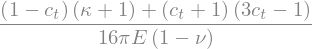

In [25]:
#kappa = 3 - 4 * nu
a_11 = (1/(16*(E*(1 - nu))*sp.pi)) * ((1 + cs_theta[0]) * (kappa - cs_theta[0]))
a_12 = (1/(16*(E*(1 - nu))*sp.pi)) * cs_theta[1] * ( 2 * cs_theta[0] - (kappa - 1))
a_22 = (1/(16*(E*(1 - nu))*sp.pi)) * ((kappa + 1)*(1 - cs_theta[0]) + (1 + cs_theta[0])* (3 * cs_theta[0] -1))
a_22

In [26]:
params = {kappa : 2.16, nu : 0.21, E : 1000}

In [27]:
a_11_ = a_11.subs(params)
a_12_ = a_12.subs(params)
a_22_ = a_22.subs(params)

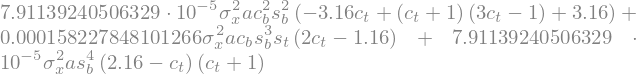

In [28]:
#a_11, a_12, a_22 = sp.symbols('a_{11}, a_{12}, a_{22}')
S = a_11_ * K_I**2 + 2 * a_12_ * K_I * K_II + a_22_ * K_II**2
S

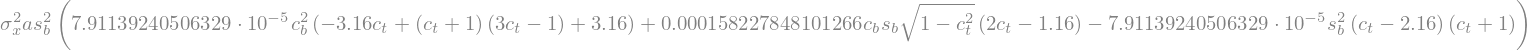

In [29]:
s_t_ = sp.sqrt(1 - c_t**2)
S_ = S.subs(s_t, s_t_).subs(params)
S_sim = sp.simplify(S_)
S_sim

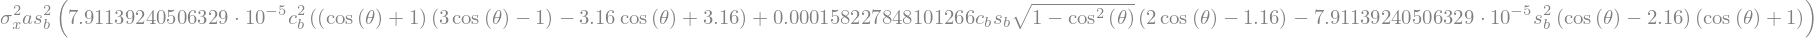

In [30]:
S_ct = S_sim.subs(cs_theta[0], cs_theta_[0])
S_ct

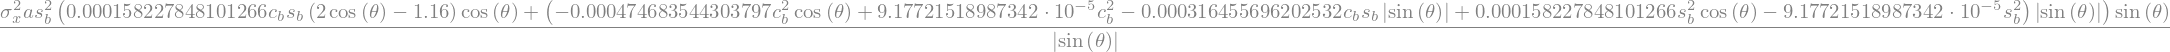

In [31]:
diff_S_theta = S_ct.diff(theta)
diff_S_theta_ = sp.simplify(diff_S_theta)
diff_S_theta_

In [32]:
#d_S_ct = S_.diff(c_t)
#d_S_cos = cs_theta_[0].diff(theta)
#d_S_d_theta = d_S_ct * d_S_cos
#d_S_d_theta.subs(c_t, cs_theta_[0])

In [ ]:
theta_val = sp.solve(S_ct, theta)
theta_val

In [ ]:
theta_val[3]

In [ ]:
theta_val_ = theta_val[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_val_

In [ ]:
theta_val_a = theta_val[3].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_val_a

In [ ]:
params = {kappa : 2.16}
get_theta = sp.lambdify((beta), theta_val_.subs(params), 'numpy')
get_theta
theta_val_.subs(params)

In [ ]:
get_theta_ = sp.lambdify((beta), theta_val_a.subs(params), 'numpy')
get_theta_

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta = np.linspace(0, 90 * np.pi/180, 100)
#theta = get_theta(beta)
theta_ = get_theta_(beta)
#ax1.plot(beta * 180/np.pi, theta * 180/ np.pi, color='blue', lw=2)
ax1.plot(beta * 180/np.pi, theta_ * 180/ np.pi, color='blue', lw=2)
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()